### EDA for Movie data set

In [63]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
from datetime import datetime

In [4]:
dataset = pd.read_excel("Movie Data cleaned and ready.xlsx")
dataset.head()

,Genre,Production Company,Director,Movie Title,Top Actor,Release year,MPAA Rating,Creative Type,Source,Video Release,Production Method,MovieLens Rating,Movie Length (min),Opening Weekend Theaters,Maximum Theaters,Release Date,Global Box Office ($),U.S. Box Office ($),Int'l Box Office ($),Budget ($),Profit ($),Opening Weekend ($),U.S. DVD + BluRay Sales ($)
0,Adventure,Centropolis Entertainment,Roland Emmerich,"10,000 B.C.",Steven Strait,2008,PG-13,Historical Fiction,Original Screenplay,2008-06-24,Live Action,2.53,109,3410,3454,2008-03-07,295853382,110493559,191632633,115453615,180399768,35867488,0
1,Comedy,Walt Disney Pictures,Kevin Lima,102 Dalmatians,Glenn Close,2000,G,Kids Fiction,Fiction Book/Short Story,NaT,Live Action,2.42,100,2704,2704,2000-11-22,91968195,103314442,0,116777928,-24809733,19883351,0
2,Action,Wwe Studios,Renny Harlin,12 Rounds,John Cena,2009,PG-13,Contemporary Fiction,Original Screenplay,2009-06-30,Live Action,2.78,0,2331,2331,2009-03-27,19106092,13653922,5599306,22079483,-2973391,5329240,0
3,Drama,Regency Enterprises,Steve Rodney Mcqueen,12 Years A Slave,Chiwetel Ejiofor,2013,R,Historical Fiction,Factual Book/Article,2014-03-04,Live Action,3.90,133,19,1474,2013-10-18,183921748,58253216,126343004,20320000,163601748,923715,23731139
4,Drama,Big Screen Prods,Danny Boyle,127 Hours,James Franco,2010,R,Dramatization,Real Life Events,2011-03-01,Live Action,3.72,93,4,916,2010-11-05,65431298,19408398,45508444,19558597,45872702,264851,13305991


In [5]:
dataset.shape

(1759, 23)

In [7]:
# to check duplicacy
dataset.duplicated().sum()

0

In [8]:
# check null values
dataset.isnull().sum()

Genre                            0
Production Company               0
Director                         0
Movie Title                      0
Top Actor                        0
Release year                     0
MPAA Rating                      0
Creative Type                    2
Source                           0
Video Release                  122
Production Method                0
MovieLens Rating                 0
Movie Length (min)               0
Opening Weekend Theaters         0
Maximum Theaters                 0
Release Date                     0
Global Box Office ($)            0
U.S. Box Office ($)              0
Int'l Box Office ($)             0
Budget ($)                       0
Profit ($)                       0
Opening Weekend ($)              0
U.S. DVD + BluRay Sales ($)      0
dtype: int64

In [9]:
dataset.describe()

,Release year,MovieLens Rating,Movie Length (min),Opening Weekend Theaters,Maximum Theaters,Global Box Office ($),U.S. Box Office ($),Int'l Box Office ($),Budget ($),Profit ($),Opening Weekend ($),U.S. DVD + BluRay Sales ($)
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1.759000e+03,1.759000e+03,1.759000e+03,1.759000e+03,1.759000e+03,1.759000e+03,1.759000e+03
mean,2007.976691,2.999744,102.649801,2142.812393,2357.527004,1.988734e+08,9.354503e+07,1.097534e+08,5.985111e+07,1.390223e+08,1.950491e+07,1.704992e+07
std,6.169766,0.940848,33.755666,1397.803360,1243.215080,3.206765e+08,1.281538e+08,1.930156e+08,5.714483e+07,2.909628e+08,2.488012e+07,4.234444e+07
min,1939.000000,0.000000,0.000000,0.000000,0.000000,5.870000e+02,5.870000e+02,0.000000e+00,5.870000e+02,-1.162926e+08,0.000000e+00,0.000000e+00
25%,2004.000000,2.850000,94.000000,381.500000,1533.500000,3.022680e+07,1.812954e+07,6.830084e+06,1.742186e+07,2.468105e+06,1.552238e+06,0.000000e+00
50%,2010.000000,3.210000,105.000000,2653.000000,2759.000000,1.006259e+08,5.574433e+07,4.437410e+07,4.106546e+07,5.135490e+07,1.269142e+07,0.000000e+00
75%,2012.000000,3.550000,120.000000,3183.000000,3238.000000,2.431852e+08,1.208165e+08,1.287283e+08,8.764093e+07,1.625146e+08,2.570203e+07,1.517612e+07
max,2015.000000,4.250000,220.000000,4468.000000,4468.000000,6.647237e+09,2.033988e+09,3.265442e+09,4.691890e+08,6.580854e+09,2.088063e+08,5.462207e+08


In [10]:
# Univariate Analysis

dataset.Genre.value_counts()

Drama                  441
Comedy                 376
Action                 234
Adventure              232
Thriller/Suspense      212
Romantic Comedy         98
Horror                  87
Documentary             24
Black Comedy            22
Musical                 20
Western                  8
Concert/Performance      5
Name: Genre, dtype: int64

In [27]:
px.histogram(data_frame=dataset, x="Genre", template="seaborn",color="Genre" , text_auto=True
            , title="<b> Genre frquency in data").update_layout(xaxis={'categoryorder':'total descending'})

In [52]:
dataset.groupby("Genre",as_index=False)[["Profit ($)"]].sum().sort_values(by = "Profit ($)", ascending=False)


,Genre,Profit ($)
1,Adventure,78478296109
0,Action,50174516295
6,Drama,36531899775
3,Comedy,35093379103
10,Thriller/Suspense,20344836467
9,Romantic Comedy,10248912454
7,Horror,8833958599
8,Musical,2685547930
2,Black Comedy,1192156216
11,Western,481528611


In [41]:
Top_5 = dataset.groupby("Genre",as_index=False)[["Profit ($)"]].sum().sort_values(by = "Profit ($)", ascending=False)
Top_5[:5]

,Genre,Profit ($)
1,Adventure,78478296109
0,Action,50174516295
6,Drama,36531899775
3,Comedy,35093379103
10,Thriller/Suspense,20344836467


In [44]:
px.histogram(Top_5[:5], x="Genre", y="Profit ($)", template="seaborn", color="Genre",text_auto=True,
            title="<b> Top 5 Genre in terms of Profit")

In [53]:
px.histogram(Top_5[-5:], x="Genre", y="Profit ($)", template="seaborn", color="Genre",text_auto=True,
            title="<b> bottom 5 Genre")

In [62]:

# Top 10 Movies
dataset.groupby(["Movie Title"])[["Profit ($)"]].sum().sort_values(by = "Profit ($)", ascending=False).head(10)


,Profit ($)
Movie Title,
Gone With The Wind,6580854308
Star Wars Ep. Iv: A New Hope,3029129982
Titanic,2961335132
Avatar,2604185537
Jaws,2018738894
Et: The Extra-terrestrial,1919059709
Jurassic Park,1599656485
Star Wars Ep. V: The Empire Strikes Back,1468532853
The Lion King,1451058615


<AxesSubplot:>

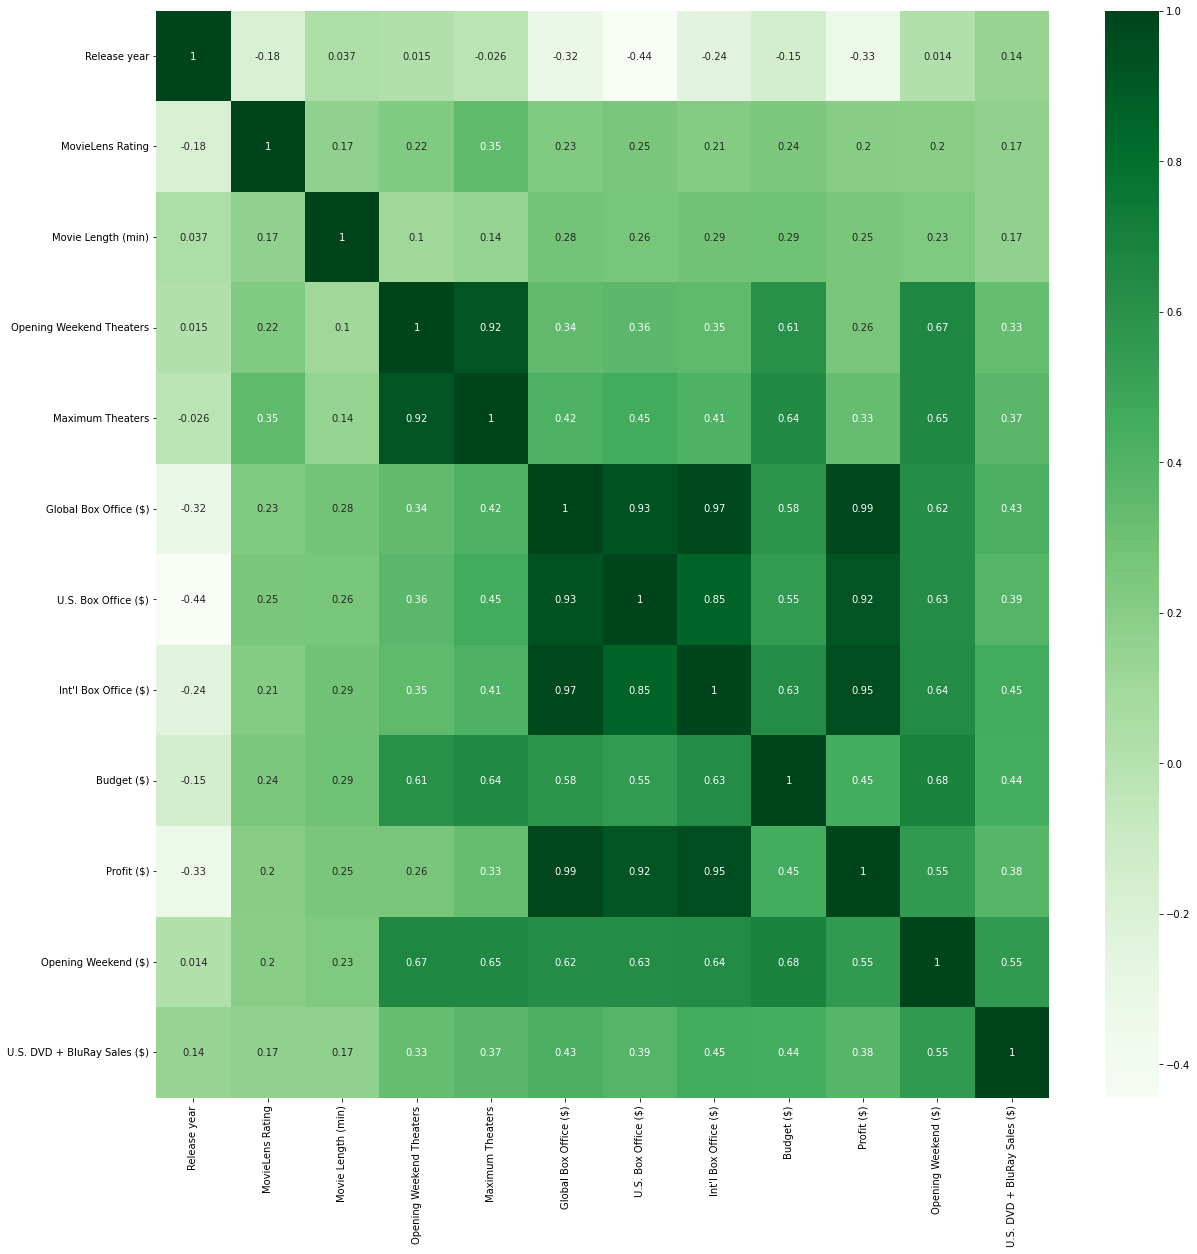

In [68]:
## Correlation
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True ,  cmap="Greens")

In [69]:
dataset.columns

Index(['Genre', 'Production Company', 'Director', 'Movie Title', 'Top Actor',
       'Release year', 'MPAA Rating', 'Creative Type', 'Source',
       'Video Release', 'Production Method', 'MovieLens Rating',
       'Movie Length (min)', 'Opening Weekend Theaters', 'Maximum Theaters',
       'Release Date', 'Global Box Office ($)', 'U.S. Box Office ($)',
       'Int'l Box Office ($)', 'Budget ($)', 'Profit ($)',
       'Opening Weekend ($)', 'U.S. DVD + BluRay Sales ($)'],
      dtype='object')

In [72]:
Cat_var = dataset.select_dtypes(include="O").columns
Cat_var

Index(['Genre', 'Production Company', 'Director', 'Movie Title', 'Top Actor',
       'MPAA Rating', 'Creative Type', 'Source', 'Production Method'],
      dtype='object')

In [84]:
dataset.groupby("Top Actor", as_index=False)[["Profit ($)"]].sum().sort_values(by="Profit ($)", ascending = False)[:10]

,Top Actor,Profit ($)
740,Tom Hanks,6653573690
761,Vivien Leigh,6580854308
162,Daniel Radcliffe,5678254772
374,Johnny Depp,5643019692
625,"Robert Downey, Jr.",5500892246
738,Tom Cruise,5077316889
465,Leonardo Dicaprio,4774959367
486,Mark Hamill,4497662835
100,Bruce Willis,4386306859
532,Mike Myers,3847336605


In [86]:
dataset.groupby("Release year", as_index=False)[["Profit ($)"]].sum().sort_values(by="Profit ($)", ascending = False)

,Release year,Profit ($)
34,2012,18288618324
35,2013,17591453874
36,2014,17221927348
33,2011,16790026692
31,2009,14596195835
32,2010,13975072373
30,2008,11860472827
26,2004,10799777610
29,2007,10780243371
24,2002,10442184563


In [89]:
dataset["Release year"].value_counts(ascending=False)[:10]

2011    207
2012    177
2014    161
2013    161
2010    133
2015     87
2008     86
2009     82
2006     79
2005     74
Name: Release year, dtype: int64